# Data disponibles

**application_train et application_test** : dataset de train et de test avec informations sur les demandes de prêts auprès de Home Credit. Chaque prêt a une ligne et est identifié par **SK_ID_CURR**. Le jeu de train dispose d'une **target** :
-  0 indique que le prêt est remboursé
-  1 indique que le prêt n'est pas remboursé

**bureau** : données sur les précédents crédits d'un client auprès d'autres institutions financières. Chaque crédit a une ligne. Un prêt des datasets **application** peuvent avoir **plusieurs anciens crédits**.

**bureau_balance** : données mensuelles sur les anciens crédits de **bureau**. Chaque ligne est un mois d'un ancien crédit, un ancien crédit peut avoir peut avoir plusieurs lignes, une pour chaque mois de la durée du crédit

**previous_application** : précédentes candidatures pour un prêt chez Home Credit pour les clients qui ont un prêt dans les datasets **application**. Un prêt actuel peut avoir plusieurs anciennes candidatures. Chaque candidature a une ligne identifiée par **SK_ID_PREV**

**POS_CASH_BALANCE** : données mensuelles sur les points de vente, ou les prêts en espèces que les clients ont eu aurpès de Home Credit. Chaque ligne correspond à un mois d'un point de vente ou d'un prêt en espèce précédent. Un anciens prêt peut avoir plusieurs lignes

**credit_card_balance** : données mensuelles sur d'anciennes cartes de crédit que les clients ont eu avec Home Credit. Chaque ligne correspond à un mois du solde de la carte. Une carte peut avoir plusieurs lignes.

**installments_payments** : historique de paiement pour les précédents prêts auprès de Home Credit. Une ligne pour chaque paiement effectué et une ligne pour chaque paiement manqué.

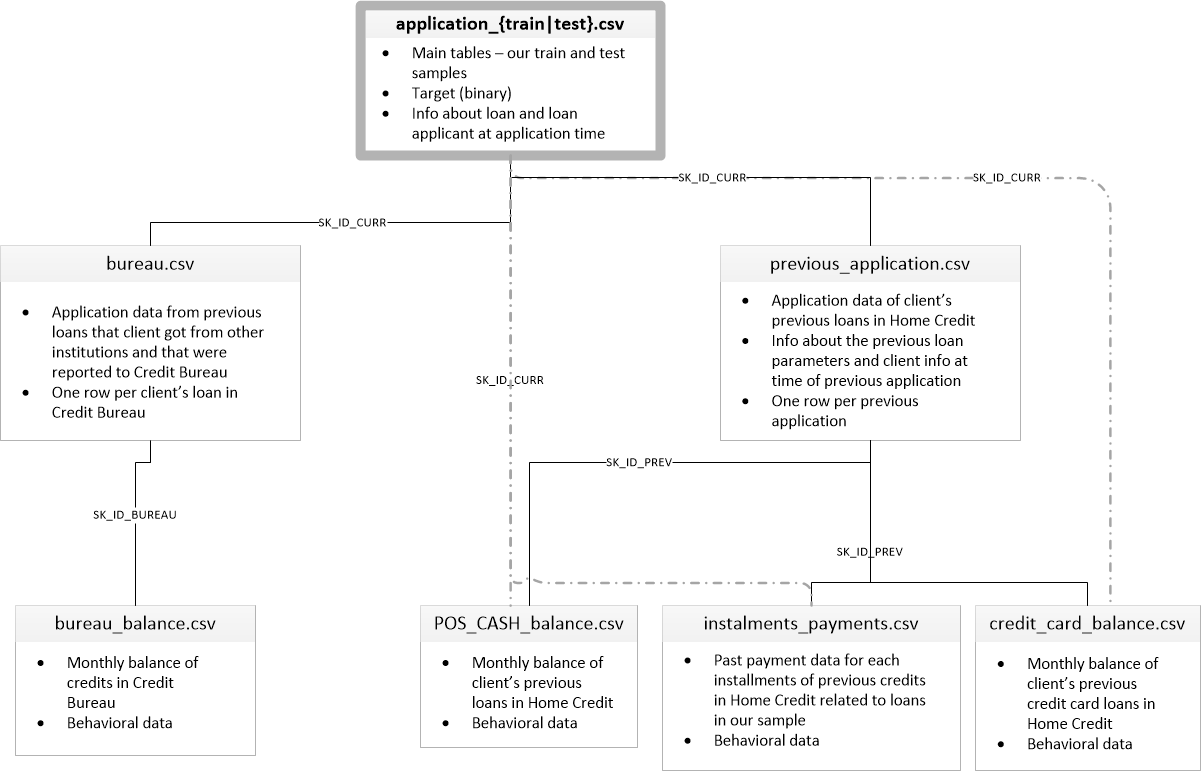

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os
from os import listdir

# Suppress warnings 
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

In [2]:
# Fonctions

# Valeurs manquantes
from functions import missing_values_table
# Barplot sur application_train pour les types de prêts et pourcentage, pour les prêts non remboursés (TARGET = 1)
from functions import plot_stats

In [6]:
# Chemin de fichier
#path = "/Users/antoinemorvan/Documents/Openclassrooms/P7/datasets/"
# Version windows
path = "C:/Users/F7936/Documents/Autres/OC _P7/datasets/"
# Datasets
app_train = pd.read_csv(path+"application_train.csv")
app_test = pd.read_csv(path+"application_test.csv")
bureau = pd.read_csv(path+"bureau.csv")
bureau_balance = pd.read_csv(path+"bureau_balance.csv")
previous_app = pd.read_csv(path+"previous_application.csv")
pos_cash_balance = pd.read_csv(path+"POS_CASH_BALANCE.csv") 
credit_card_balance = pd.read_csv(path+"credit_card_balance.csv")
installments_payments = pd.read_csv(path+"installments_payments.csv")

# Aperçu des données

## app_train et app_test

In [7]:
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
print('Test data shape: ', app_test.shape)
app_test.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

## Bureau

In [9]:
print('bureau data shape: ', bureau.shape)
bureau.head()

bureau data shape:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


## bureau_balance

In [10]:
print('bureau_balance data shape: ', bureau_balance.shape)
bureau_balance.head()

bureau_balance data shape:  (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


## previous_app

In [11]:
print('previous_app data shape: ', previous_app.shape)
previous_app.head()

previous_app data shape:  (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## pos_cash_balance

In [12]:
print('pos_cash_balance data shape: ', pos_cash_balance.shape)
pos_cash_balance.head()

pos_cash_balance data shape:  (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## credit_card_balance

print('credit_card_balance data shape: ', credit_card_balance.shape)
credit_card_balance.head()

## installments_payments

In [13]:
print('installments_payments data shape: ', installments_payments.shape)
installments_payments.head()

installments_payments data shape:  (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


# Données manquantes

In [14]:
# app_train
app_train_missing_values = missing_values_table(app_train)
app_train_missing_values.head(20)

Le Dataframe sélectionné a 122 colonnes.
Il y a 67 colonnes avec des données manquantes.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [15]:
# app_test
app_test_missing_values = missing_values_table(app_test)
app_test_missing_values.head(5)

Le Dataframe sélectionné a 121 colonnes.
Il y a 64 colonnes avec des données manquantes.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4


In [16]:
# bureau
bureau_missing_values = missing_values_table(bureau)
bureau_missing_values.head(5)

Le Dataframe sélectionné a 17 colonnes.
Il y a 7 colonnes avec des données manquantes.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0


In [17]:
# bureau_balance
bureau_balance_missing_values = missing_values_table(bureau_balance)
bureau_balance_missing_values.head(5)

Le Dataframe sélectionné a 3 colonnes.
Il y a 0 colonnes avec des données manquantes.


,Missing Values,% of Total Values


In [18]:
# previous_app
previous_app_missing_values = missing_values_table(previous_app)
previous_app_missing_values.head(5)

Le Dataframe sélectionné a 37 colonnes.
Il y a 16 colonnes avec des données manquantes.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1


In [19]:
# pos_cash_balance
pos_cash_balance_missing_values = missing_values_table(pos_cash_balance)
pos_cash_balance_missing_values.head(5)

Le Dataframe sélectionné a 8 colonnes.
Il y a 2 colonnes avec des données manquantes.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [20]:
# credit_card_balance
credit_card_balance_missing_values = missing_values_table(credit_card_balance)
credit_card_balance_missing_values.head(5)

Le Dataframe sélectionné a 23 colonnes.
Il y a 9 colonnes avec des données manquantes.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5


In [21]:
# installments_payments
installments_payments_missing_values = missing_values_table(installments_payments)
installments_payments_missing_values.head(5)

Le Dataframe sélectionné a 8 colonnes.
Il y a 2 colonnes avec des données manquantes.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


# Distribution de la cible
- Target = 0 : le prêt est remboursé
- Target = 1 : prêt non remboursé

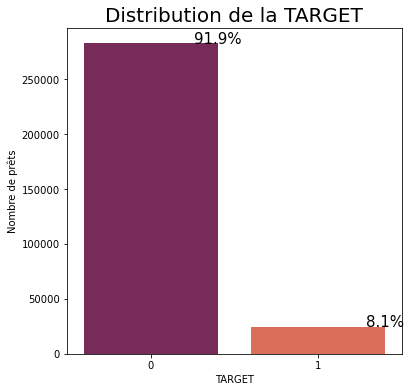

In [22]:
fig = plt.figure(figsize=(6, 6))

total = float(len(app_train))

ax = sns.countplot(data=app_train, x="TARGET",
              palette="rocket")

plt.ylabel("Nombre de prêts")
plt.title("Distribution de la TARGET", fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100\
                                  * p.get_height()\
                                  /total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),
                ha='center', fontsize = 15)
    
plt.show()

# EDA

## Application data
Analyse des types de prêts pour les prêts non remboursés (**target = 1**)

  NAME_CONTRACT_TYPE    TARGET
0         Cash loans  0.083459
1    Revolving loans  0.054783


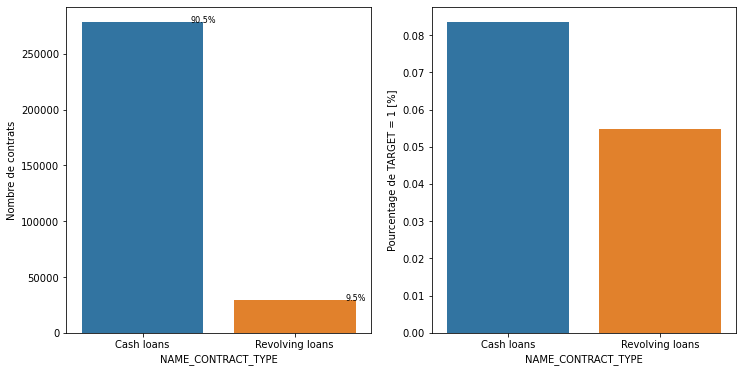

In [23]:
plot_stats(app_train, 'NAME_CONTRACT_TYPE')

  CODE_GENDER    TARGET
1           M  0.101419
0           F  0.069993
2         XNA  0.000000


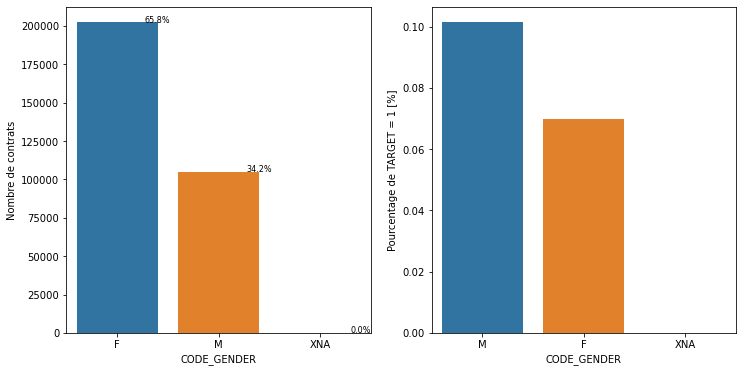

In [24]:
plot_stats(app_train, 'CODE_GENDER')

  FLAG_OWN_CAR    TARGET
0            N  0.085002
1            Y  0.072437


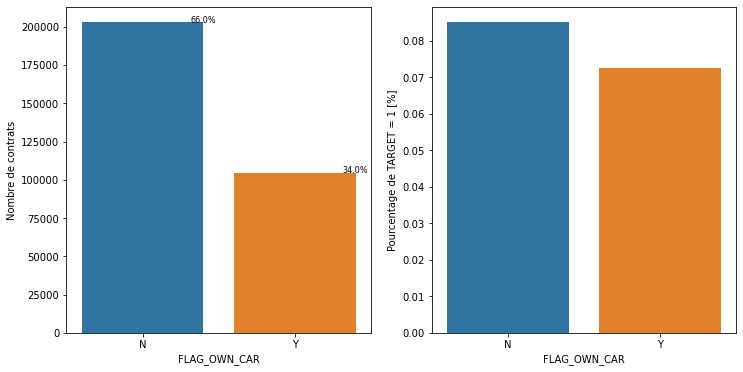

  FLAG_OWN_REALTY    TARGET
0               N  0.083249
1               Y  0.079616


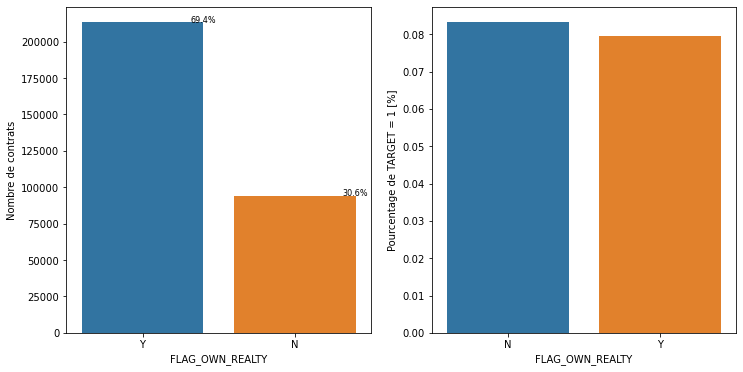

In [25]:
plot_stats(app_train, 'FLAG_OWN_CAR')
plot_stats(app_train, 'FLAG_OWN_REALTY')

     NAME_FAMILY_STATUS    TARGET
0        Civil marriage  0.099446
3  Single / not married  0.098077
2             Separated  0.081942
1               Married  0.075599
5                 Widow  0.058242
4               Unknown  0.000000


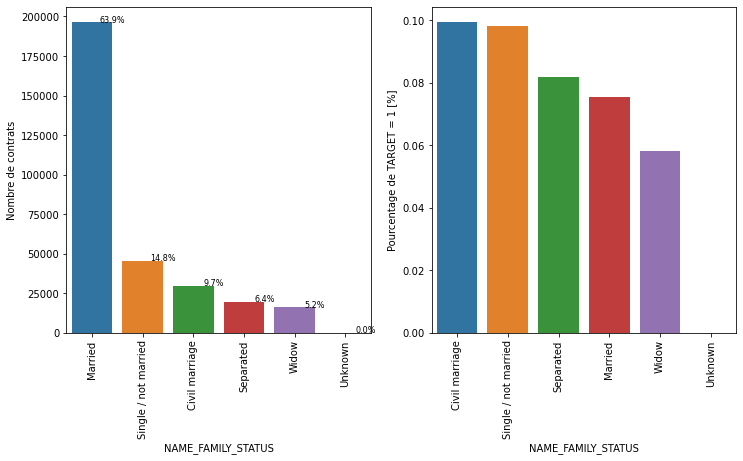

In [26]:
plot_stats(app_train, 'NAME_FAMILY_STATUS', True, True)

    CNT_CHILDREN    TARGET
9              9  1.000000
11            11  1.000000
6              6  0.285714
4              4  0.128205
3              3  0.096314
1              1  0.089236
2              2  0.087218
5              5  0.083333
0              0  0.077118
7              7  0.000000
8              8  0.000000
10            10  0.000000
12            12  0.000000
13            14  0.000000
14            19  0.000000


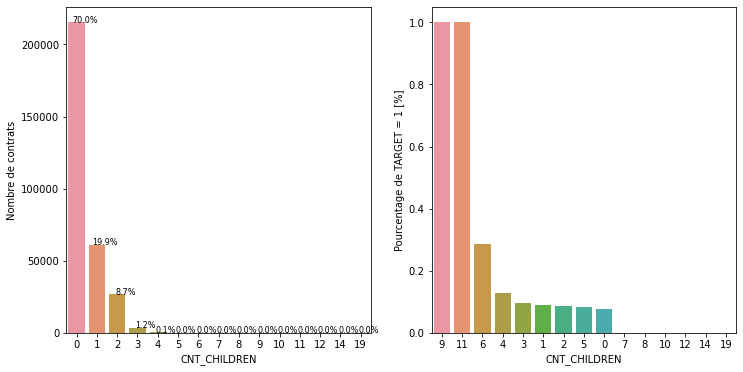

In [27]:
plot_stats(app_train, 'CNT_CHILDREN')

    CNT_FAM_MEMBERS    TARGET
10             11.0  1.000000
12             13.0  1.000000
9              10.0  0.333333
7               8.0  0.300000
5               6.0  0.134804
4               5.0  0.094020
2               3.0  0.087603
3               4.0  0.086488
0               1.0  0.083644
1               2.0  0.075835
6               7.0  0.074074
14             15.0  0.000000
15             16.0  0.000000
8               9.0  0.000000
13             14.0  0.000000
11             12.0  0.000000
16             20.0  0.000000


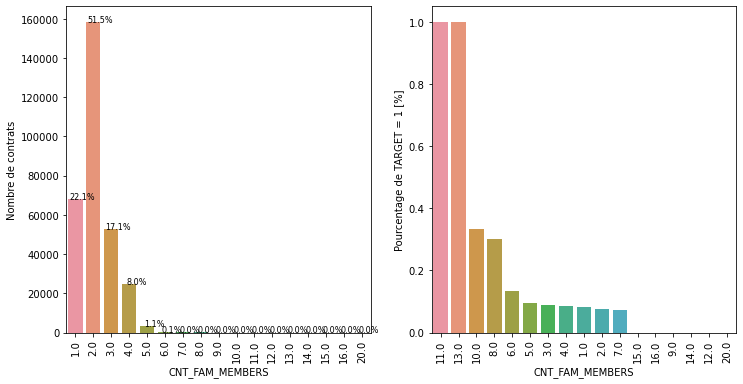

In [28]:
plot_stats(app_train, 'CNT_FAM_MEMBERS',True)

       NAME_INCOME_TYPE    TARGET
2       Maternity leave  0.400000
6            Unemployed  0.363636
7               Working  0.095885
1  Commercial associate  0.074843
4         State servant  0.057550
3             Pensioner  0.053864
0           Businessman  0.000000
5               Student  0.000000


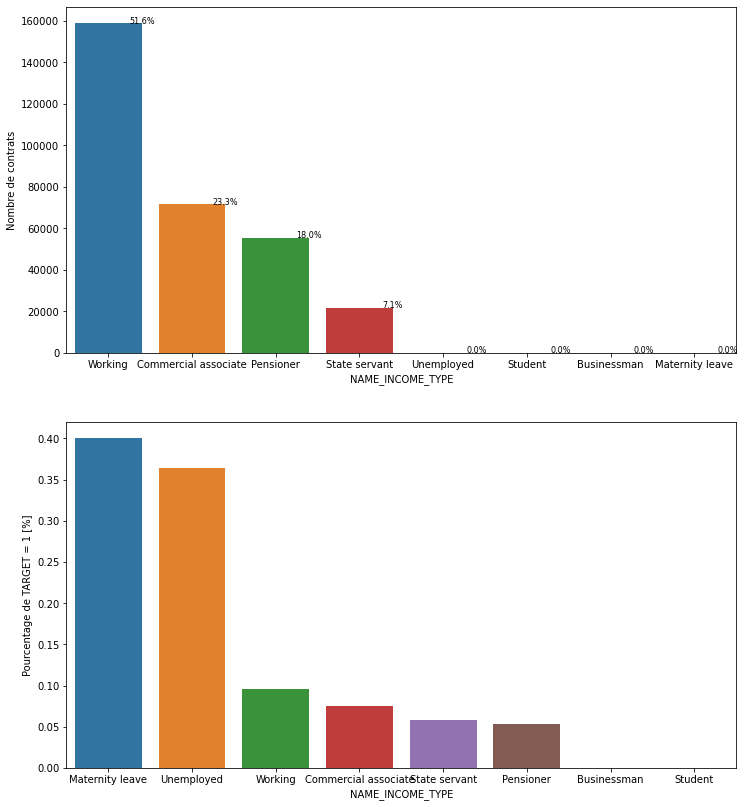

In [29]:
plot_stats(app_train, 'NAME_INCOME_TYPE',False,False)

          OCCUPATION_TYPE    TARGET
9      Low-skill Laborers  0.171524
4                 Drivers  0.113261
17   Waiters/barmen staff  0.112760
16         Security staff  0.107424
8                Laborers  0.105788
2           Cooking staff  0.104440
14            Sales staff  0.096318
1          Cleaning staff  0.096067
13          Realty agents  0.078562
15            Secretaries  0.070498
11         Medicine staff  0.067002
12  Private service staff  0.065988
7                IT staff  0.064639
5                HR staff  0.063943
3              Core staff  0.063040
10               Managers  0.062140
6   High skill tech staff  0.061599
0             Accountants  0.048303


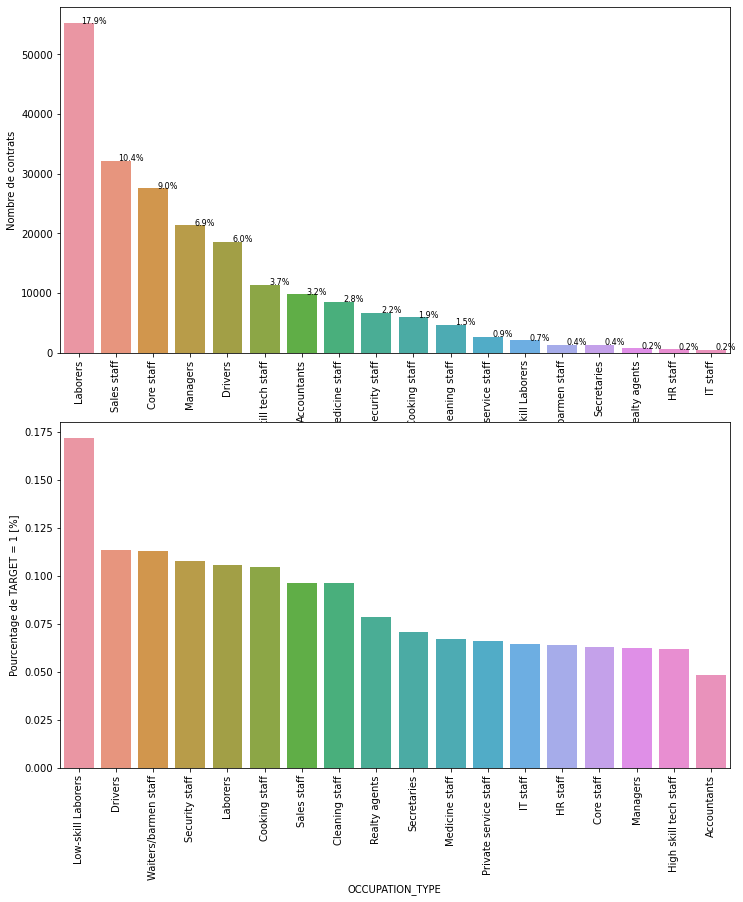

In [30]:
plot_stats(app_train, 'OCCUPATION_TYPE',True, False)

         ORGANIZATION_TYPE    TARGET
54       Transport: type 3  0.157540
18       Industry: type 13  0.134328
25        Industry: type 8  0.125000
38              Restaurant  0.117062
7             Construction  0.116798
6                 Cleaning  0.111538
14        Industry: type 1  0.110683
20        Industry: type 3  0.106162
36                 Realtor  0.106061
1              Agriculture  0.104727
47           Trade: type 3  0.103379
42           Self-employed  0.101739
21        Industry: type 4  0.101482
40                Security  0.099784
51           Trade: type 7  0.094496
5   Business Entity Type 3  0.092996
55       Transport: type 4  0.092812
32                  Mobile  0.091483
45           Trade: type 1  0.089080
16       Industry: type 11  0.086538
4   Business Entity Type 2  0.085284
35                  Postal  0.084376
0              Advertising  0.081585
3   Business Entity Type 1  0.081384
24        Industry: type 7  0.080337
13                 Housing  0.079446
2

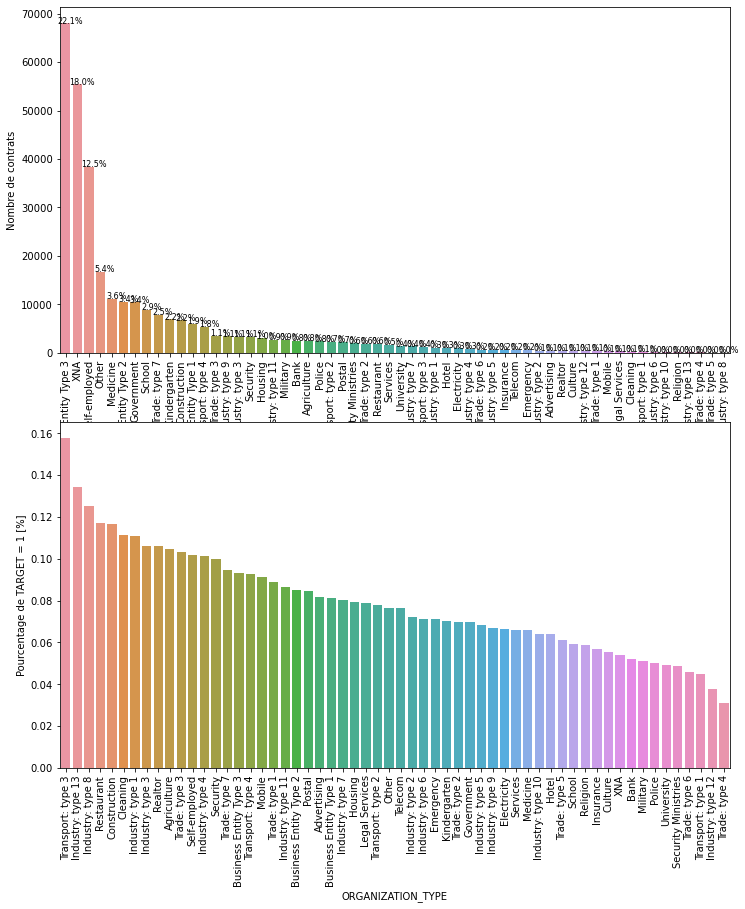

In [31]:
plot_stats(app_train, 'ORGANIZATION_TYPE',True, False)

             NAME_EDUCATION_TYPE    TARGET
3                Lower secondary  0.109277
4  Secondary / secondary special  0.089399
2              Incomplete higher  0.084850
1               Higher education  0.053551
0                Academic degree  0.018293


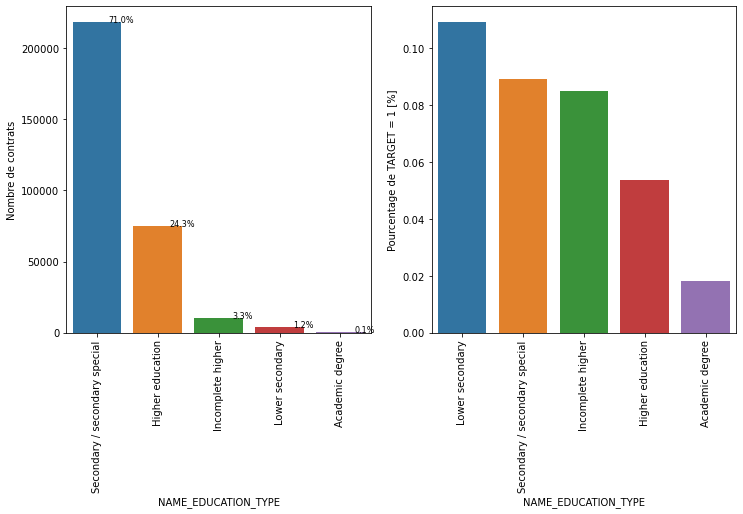

In [32]:
plot_stats(app_train, 'NAME_EDUCATION_TYPE',True)


     NAME_HOUSING_TYPE    TARGET
4     Rented apartment  0.123131
5         With parents  0.116981
2  Municipal apartment  0.085397
0      Co-op apartment  0.079323
1    House / apartment  0.077957
3     Office apartment  0.065724


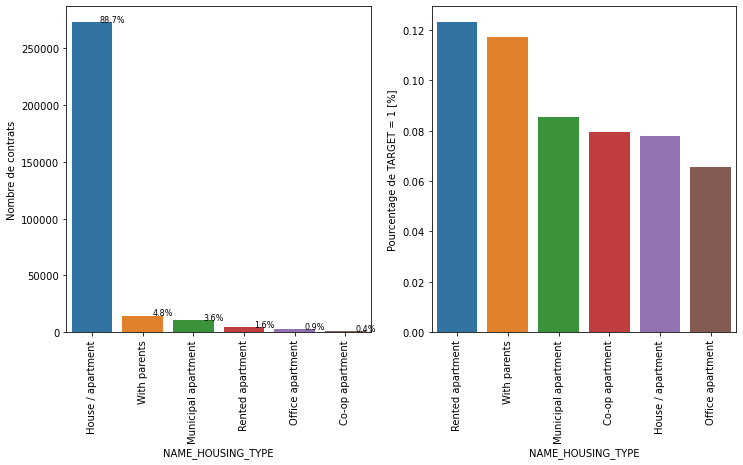

In [33]:
plot_stats(app_train, 'NAME_HOUSING_TYPE',True)

In [34]:
# Nombre de classes uniques pour chaque colonne de type objet dans app_train
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [35]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


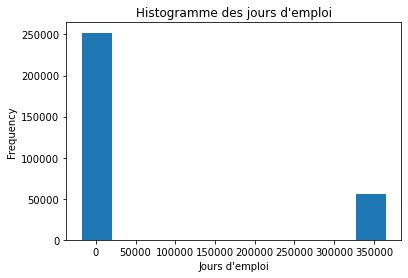

In [36]:
print(app_train['DAYS_EMPLOYED'].describe())
app_train['DAYS_EMPLOYED'].plot.hist(title = "Histogramme des jours d'emploi");
plt.xlabel("Jours d'emploi");

On retrouve des outliers : jusqu'à 1 000 ans d'emploi

In [37]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('Defauts des non-anomalies sur %0.2f%% des prêts' % (100 * non_anom['TARGET'].mean()))
print('Defauts des anomalies sur %0.2f%% des prêts' % (100 * anom['TARGET'].mean()))
print("Il y a %d anomalies pour les jours d'emploi" % len(anom))

Defauts des non-anomalies sur 8.66% des prêts
Defauts des anomalies sur 5.40% des prêts
Il y a 55374 anomalies pour les jours d'emploi


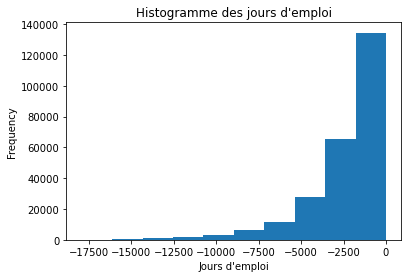

In [38]:
# Créer une colonne pour les anomalies
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Remplace les outliers par NaN
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = "Histogramme des jours d'emploi");
plt.xlabel("Jours d'emploi");

In [39]:
# Correlations avec la target et tri
correlations = app_train.corr()['TARGET'].sort_values()
print('Correlation positives:\n', correlations.tail(15))
print('\nCorrelation négatives:\n', correlations.head(15))

Correlation positives:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Correlation négatives:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POP

A noter : l'âge est en valeur négative, on prend la valeur absolue pour trouver la corrélation :

In [40]:
# Corrélation des jours positifs depuis la naissance avec la target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830984513

La corrélation devient négative, et reste très faible

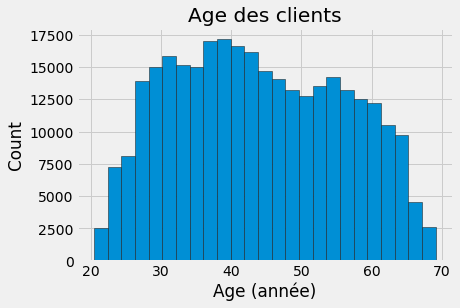

In [41]:
plt.style.use('fivethirtyeight')

# Plot distribution des âges en années
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age des clients'); plt.xlabel('Age (année)'); plt.ylabel('Count');

C:\Users\F7936\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\F7936\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


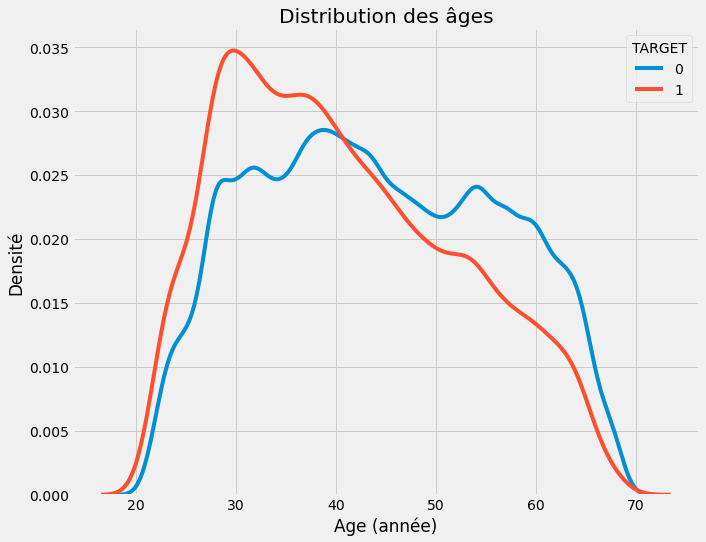

In [42]:
plt.figure(figsize = (10, 8))

# KDE plot des prêt remboursé dans les temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, hue = app_train['TARGET'])
# KDE plot des prêts non remboursés dans les temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, hue = app_train['TARGET'])


# Labeling of plot
plt.xlabel('Age (année)'); plt.ylabel('Densité'); plt.title('Distribution des âges');

<ipython-input-43-20b41119f308>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
<ipython-input-43-20b41119f308>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'],


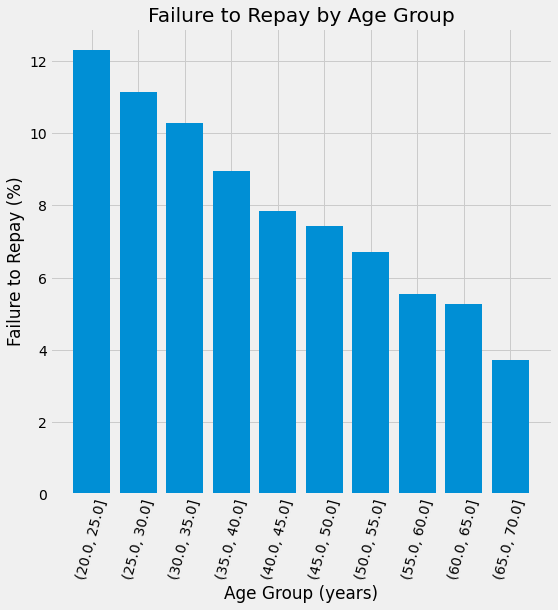

In [43]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'],
                                  bins = np.linspace(20, 70, num = 11))
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

# Test feature engineering

In [44]:
#import gc
#import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
# One-hot encoding pour les features catégorielles avec get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == object]
    df = pd.get_dummies(df, columns = categorical_columns, 
                       dummy_na = nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
# Preprocessing de app_train et app_test 
df = app_train.copy()
#df_test = app_test.copy()

# Merge les dataframes
#df = df.append(df_test).reset_index()

# Retire les 4 candidatures pour le sexe n'est pas renseigné
df[df['CODE_GENDER'] != 'XNA']

# Features catégorielles avec enconding binaire
for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df[bin_feature], uniques = pd.factorize(df[bin_feature])

# One-hot encoding
df, cat_cols = one_hot_encoder(df)

# Valeurs NaN pour DAYS_EMPLOYED : 365.243 -> nan
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

# Autres features
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

In [ ]:
#print(app_train.shape)
#app_train.head()

In [ ]:
# Preprocess bureau.csv and bureau_balance.csv
bureau_balance, bb_cat = one_hot_encoder(bureau_balance)
bureau, bureau_cat = one_hot_encoder(bureau)
    
# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
for col in bb_cat:
    bb_aggregations[col] = ['mean']
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper()\
                           for e in bb_agg.columns.tolist()])
bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
del bureau_balance, bb_agg
    
# Bureau and bureau_balance numeric features
num_aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum']}

# Bureau and bureau_balance categorical features
cat_aggregations = {}
for cat in bureau_cat: cat_aggregations[cat] = ['mean']
for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper()\
                               for e in bureau_agg.columns.tolist()])

# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg
    
# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
del closed, closed_agg, bureau

In [ ]:
# Preprocessing previous_app
previous_app, cat_cols = one_hot_encoder(previous_app, nan_as_category= True)
# Days 365.243 values -> nan
previous_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
previous_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
previous_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
previous_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
previous_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

# Add feature: value ask / value received percentage
previous_app['APP_CREDIT_PERC'] = previous_app['AMT_APPLICATION'] / previous_app['AMT_CREDIT']

# previous_appious applications numeric features
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],}

# previous_appious applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean']
    
previous_app_agg = previous_app.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
previous_app_agg.columns = pd.Index(['previous_app_' + e[0] + "_" + e[1].upper() for e in previous_app_agg.columns.tolist()])

# previous_appious Applications: Approved Applications - only numerical features
approved = previous_app[previous_app['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
previous_app_agg = previous_app_agg.join(approved_agg, how='left', on='SK_ID_CURR')

# previous_appious Applications: Refused Applications - only numerical features
refused = previous_app[previous_app['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
previous_app_agg = previous_app_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg, previous_app

In [ ]:
# Preprocessing pos_cash_balance_CASH_balance.csv
pos_cash_balance, cat_cols = one_hot_encoder(pos_cash_balance, nan_as_category= True)

# Features
aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']}
    
for cat in cat_cols:
    aggregations[cat] = ['mean']
    
pos_cash_balance_agg = pos_cash_balance.groupby('SK_ID_CURR').agg(aggregations)
pos_cash_balance_agg.columns = pd.Index(['pos_cash_balance_' + e[0] + "_" + e[1].upper()\
                                         for e in pos_cash_balance_agg.columns.tolist()])
# Count pos_cash_balance cash accounts
pos_cash_balance_agg['pos_cash_balance_COUNT'] = pos_cash_balance.groupby('SK_ID_CURR').size()
del pos_cash_balance

In [ ]:
# Preprocessing installments_paymentstallments_payments
installments_payments, cat_cols = one_hot_encoder(installments_payments, nan_as_category= True)

# Percentage and difference paid in each installments_paymentstallment (amount paid and installments_paymentstallment value)
installments_payments['PAYMENT_PERC'] = installments_payments['AMT_PAYMENT']\
                                        / installments_payments['AMT_INSTALMENT']
installments_payments['PAYMENT_DIFF'] = installments_payments['AMT_INSTALMENT']\
                                        - installments_payments['AMT_PAYMENT']

# Days past due and days before due (no negative values)
installments_payments['DPD'] = installments_payments['DAYS_ENTRY_PAYMENT']\
                                - installments_payments['DAYS_INSTALMENT']
installments_payments['DBD'] = installments_payments['DAYS_INSTALMENT']\
                                - installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['DPD'] = installments_payments['DPD'].apply(lambda x: x if x > 0 else 0)
installments_payments['DBD'] = installments_payments['DBD'].apply(lambda x: x if x > 0 else 0)

# Features: Perform aggregations
aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']}
    
for cat in cat_cols:
    aggregations[cat] = ['mean']
installments_payments_agg = installments_payments.groupby('SK_ID_CURR').agg(aggregations)
installments_payments_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper()\
                                              for e in installments_payments_agg.columns.tolist()])

# Count installments_paymentstallments accounts
installments_payments_agg['INSTAL_COUNT'] = installments_payments.groupby('SK_ID_CURR').size()
del installments_payments

In [ ]:
# Preprocessing credit_card_balance 
credit_card_balance, cat_cols = one_hot_encoder(credit_card_balance, nan_as_category= True)

# General aggregations
credit_card_balance.drop(['SK_ID_PREV'], axis= 1, inplace = True)
cc_agg = credit_card_balance.groupby('SK_ID_CURR')\
        .agg(['min', 'max', 'mean', 'sum', 'var'])
cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper()\
                           for e in cc_agg.columns.tolist()])

# Count credit card lines
cc_agg['CC_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()
del credit_card_balance

## Modèle

In [ ]:
print(df.shape)
print(bureau_agg.shape)
print(previous_app_agg.shape)
print(pos_cash_balance_agg.shape)
print(installments_payments_agg.shape)
print(cc_agg.shape)

In [ ]:
# Jointure

In [ ]:
# Train et test df
#train_df = df[df['TARGET'].notnull()]
#test_df = df[df['TARGET'].isnull()]
#print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))

In [ ]:
df